In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
minst = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


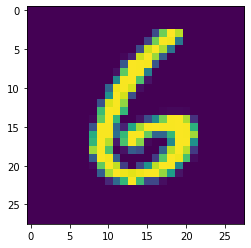

In [5]:
plt.imshow(minst.train.images[1000].reshape(28,28))

In [6]:
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])

In [7]:

#weights and bias
weight1=tf.Variable(tf.truncated_normal([784,200],stddev=0.1))       #(tf.zeros([784,200]))

bias1=tf.Variable(tf.truncated_normal([200],stddev=0.1))  #(tf.zeros([200]))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)
I1=tf.add(tf.matmul(x,weight1),bias1)

#activation function
output1=tf.nn.relu(I1)

In [8]:

#weights and bias
weight2=tf.Variable(tf.truncated_normal([200,100],stddev=0.1))  #(tf.zeros([200,100]))

bias2=tf.Variable(tf.truncated_normal([100],stddev=0.1))  #(tf.zeros([100]))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)
I2=tf.add(tf.matmul(output1,weight2),bias2)

#activation function
output2=tf.nn.relu(I2)

In [9]:

#weights and bias
weight3=tf.Variable(tf.truncated_normal([100,60],stddev=0.1))  #(tf.zeros([100,60]))

bias3=tf.Variable(tf.truncated_normal([60],stddev=0.1))  #(tf.zeros([60]))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)
I3=tf.add(tf.matmul(output2,weight3),bias3)

#activation function
output3=tf.nn.relu(I3)

In [10]:

#weights and bias
weight4=tf.Variable(tf.truncated_normal([60,30],stddev=0.1))  #(tf.zeros([60,30]))

bias4=tf.Variable(tf.truncated_normal([30],stddev=0.1))  #(tf.zeros([30]))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)
I4=tf.add(tf.matmul(output3,weight4),bias4)

#activation function
output4=tf.nn.relu(I4)

In [11]:

#weights and bias
weight5=tf.Variable(tf.truncated_normal([30,10],stddev=0.1))  #(tf.zeros([30,10]))

bias5=tf.Variable(tf.truncated_normal([10],stddev=0.1))  #(tf.zeros([10]))
#input function
#mult=tf.matmul(x,weight)
#I=tf.add(mult,bias)
I5=tf.add(tf.matmul(output4,weight5),bias5)

#activation function
output5=tf.nn.softmax(I5)

In [12]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=output5)
loss=tf.reduce_mean(individual_loss)

gdo=tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=gdo.minimize(loss)

In [13]:
init=tf.global_variables_initializer()

In [14]:
sess=tf.Session()
sess.run(init)
sess.run(weight1)

array([[-0.07366817, -0.05682602,  0.07162344, ...,  0.04015383,
        -0.1381484 , -0.11060146],
       [-0.07707365, -0.01219017,  0.18912959, ...,  0.07635931,
         0.02582992, -0.07647707],
       [ 0.06453153,  0.0560873 , -0.17949395, ..., -0.16634813,
        -0.00341526, -0.13310026],
       ...,
       [ 0.00160834, -0.0437951 , -0.13017559, ..., -0.0429532 ,
         0.04262911,  0.10177099],
       [ 0.16209815, -0.17145935, -0.04717358, ..., -0.13655636,
        -0.05424955,  0.03009821],
       [ 0.02383238,  0.00026624, -0.07433498, ..., -0.11555707,
         0.02438983,  0.08203433]], dtype=float32)

In [15]:
for i in range(10000):
    batch_x , batch_y = minst.train.next_batch(200)
    sess.run(train,feed_dict={x:batch_x,y:batch_y})

In [16]:
result=(sess.run(output5,feed_dict={x:minst.test.images}))

In [17]:
y_pred=result.argmax(axis=1)

In [19]:
accuracy_score(Y_label,y_pred)

0.9752